# **Taller de Aprendizaje Automático en Python - Día 2**

## **Autores:**



*   José Clemente Hernández Hernández
*   Gustavo Adolfo Vargas Hákim


# **Algoritmo de K Vecinos más Cercanos**

Utilizaremos la librería **Scikit-Learn** para implementar un clasificador utilizando el algoritmo K Vecinos más Cercanos.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split #Para separar nuestros datos en entrenamiento y prueba
from sklearn import metrics #Métricas de evaluación
from sklearn.neighbors import KNeighborsClassifier # La clase del KNN

Nuevamente, la base de datos de ejemplo será IRIS

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/GustavoVargasHakim/Machine-Learning-en-Python/main/iris.csv")
X = data.drop(columns = ["variety"])
y = data["variety"]

Sabemos que los datos pertenecen a una distribución continua

In [ ]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


En este caso, entrenando con todo el conjunto de datos

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Y probando, de igual manera, con todas las instancias

In [ ]:
metrics.accuracy_score(y, neigh.predict(X))

0.96

# **Algoritmo Ingenuo Bayesiano**

Utilizaremos la librería **Scikit-Learn** para implementar un clasificador utilizando el algoritmo Ingenuo Bayesiano.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split #Para separar nuestros datos en entrenamiento y prueba
from sklearn.naive_bayes import GaussianNB #La clase del clasificador Naïve Bayes
from sklearn import metrics #Métricas de evaluación
from sklearn.model_selection import cross_val_score #Validación cruzada
from sklearn.metrics import confusion_matrix #Validación cruzada

Cargamos nuestra base de datos. Se trata de una colección de vinos, en la que buscamos clasificar tres tipos de bebidas según sus características.

In [ ]:
'''Leyendo datos'''
wine = pd.read_csv('https://raw.githubusercontent.com/GustavoVargasHakim/Machine-Learning-en-Python/main/wine.data')

In [ ]:
'''Explorando datos'''
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
'''Separando la clase de las características'''
X = wine.drop(columns = ['1'])
y = wine['1']

In [ ]:
'''Separemos nuestros datos en entrenamiento y prueba'''
#Separaremos nuestros datos en un 33% para prueba y 67% para entrenamiento de forma aleatoria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

Preparamos ahora a nuestro clasificador para comenzar a entrenar.

In [ ]:
'''Entrenando clasificador'''
nb = GaussianNB() #Llamando una instancia de la clase del clasificador

nb.fit(X_train, y_train) #Entrenamiento

GaussianNB(priors=None, var_smoothing=1e-09)

Podemos ahora medir el **accuracy** de nuestro modelo.

In [ ]:
'''Obteniendo el accuracy en los datos de entrenamiento y prueba'''
y_train_pred = nb.predict(X_train) #Predicciones de los datos de entrenamiento
y_test_pred = nb.predict(X_test) #Predicciones de los datos de prueba
print('Accuracy de entrenamiento: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy de prueba: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy de entrenamiento:  0.9830508474576272
Accuracy de prueba:  0.9830508474576272


Apliquemos ahora la validación cruzada con 5 **folds**.

In [ ]:
'''Aplicando validación cruzada'''
scores = cross_val_score(nb, X, y, cv = 5)
print('Los resultados de accuracy para cada fold: ', scores)

Los resultados de accuracy para cada fold:  [0.94444444 0.97222222 0.97142857 0.94285714 1.        ]


También podemos crear una matriz de confusión automáticamente. 

In [ ]:
'''Creando matriz de confusión'''
confusion_matrix(y_test, y_test_pred)

array([[23,  1,  0],
       [ 0, 20,  0],
       [ 0,  0, 15]])

Podemos darle un mejor aspecto a la matriz de confusión, si utilizamos también **matplotlib**

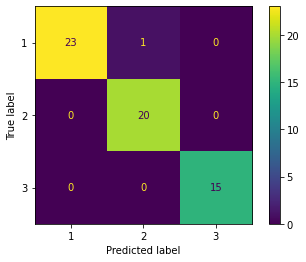

In [ ]:
'''Graficando matriz de confusión'''
from sklearn.metrics import plot_confusion_matrix #Importando graficador

plot_confusion_matrix(nb, X_test, y_test) 
plt.show()

# **Algoritmo de Árbol de Decisión**

In [113]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
pip install decision-tree-id3

     |████████████████████████████████| 163kB 2.9MB/s 
  Created wheel for decision-tree-id3: filename=decision_tree_id3-0.1.2-cp37-none-any.whl size=15962 sha256=d93b3785bf27941784e15f740485ceab9ec5641e2943b5c2a82dc31e7459a624
  Stored in directory: /root/.cache/pip/wheels/2d/d6/f2/96cb2cc307503a88b1235aef5c794990e460bd044f382070f9
Successfully built decision-tree-id3


In [114]:
from id3 import Id3Estimator

Utilizando la base de datos de TENIS

In [115]:
data = pd.read_csv("https://raw.githubusercontent.com/GustavoVargasHakim/Machine-Learning-en-Python/main/tenis.csv")
X = data.drop(columns = ["¿Jugar?"])
y = data["¿Jugar?"]

In [116]:
X = X.values
X = X.astype("<U21")
X

array([['Soleado', 'Calor', 'Alta', 'No'],
       ['Soleado', 'Calor', 'Alta', 'Sí'],
       ['Nublado', 'Calor', 'Alta', 'No'],
       ['Lluvia', 'Templado', 'Alta', 'No'],
       ['Lluvia', 'Fresco', 'Normal', 'No'],
       ['Lluvia', 'Fresco', 'Normal', 'Sí'],
       ['Nublado', 'Fresco', 'Normal', 'Sí'],
       ['Soleado', 'Templado', 'Alta', 'No'],
       ['Soleado', 'Fresco', 'Normal', 'No'],
       ['Lluvia', 'Templado', 'Normal', 'No'],
       ['Soleado', 'Templado', 'Normal', 'Sí'],
       ['Nublado', 'Templado', 'Alta', 'Sí'],
       ['Nublado', 'Calor', 'Normal', 'No'],
       ['Lluvia', 'Templado', 'Alta', 'Sí']], dtype='<U21')

In [117]:
y = y.values
y = y.astype("<U21")
y

array(['No', 'No', 'Sí', 'Sí', 'Sí', 'No', 'Sí', 'No', 'Sí', 'Sí', 'Sí',
       'Sí', 'Sí', 'No'], dtype='<U21')

In [118]:
clf = Id3Estimator()
clf.fit(X, y, check_input = False)

Id3Estimator(gain_ratio=False, is_repeating=False, max_depth=None,
             min_entropy_decrease=0.0, min_samples_split=2, prune=False)

In [119]:
print(export_text(clf.tree_, data.columns[0:-1]))


Cielo Lluvia
|   Viento No: Sí (3) 
|   Viento Sí: No (2) 
Cielo Nublado: Sí (4) 
Cielo Soleado
|   Humedad Alta: No (3) 
|   Humedad Normal: Sí (2) 



In [120]:
'''Chequeo del accuracy'''
metrics.accuracy_score(y, clf.predict(X))

1.0

IRIS discretizado

In [121]:
data = pd.read_csv("https://raw.githubusercontent.com/GustavoVargasHakim/Machine-Learning-en-Python/main/iris.csv")
X = data.drop(columns = ["variety"])
y = data["variety"]

In [92]:
pip install caimcaim

  Created wheel for caimcaim: filename=caimcaim-0.3-cp37-none-any.whl size=3866 sha256=84702689d3f2ee329914ac2a68230aae9f4246d9f9a7c9f082d028e38c9d1324
  Stored in directory: /root/.cache/pip/wheels/54/3f/ba/93c91435291033291bd84bda3b3fe1e725c6f62246040ec4f1
Successfully built caimcaim


In [122]:
'''Y la llamamos'''
from caimcaim import CAIMD

In [123]:
caim = CAIMD()
x_disc = caim.fit_transform(X, y)
x_disc["variety"] = y

Categorical []
# 0  GLOBAL CAIM  26.636271740334553
# 1  GLOBAL CAIM  17.382507167267576
# 2  GLOBAL CAIM  45.55892255892255
# 3  GLOBAL CAIM  46.16156736446592


In [124]:
X = x_disc.drop(columns = ["variety"])
X = X.values
X = X.astype("<U21")

In [125]:
y = x_disc["variety"]
y = y.values
y = y.astype("<U21")

In [126]:
clf = Id3Estimator()
clf.fit(X, y, check_input = False)
print(export_text(clf.tree_, data.columns[0:-1]))


petal.width 0.0: Setosa (49) 
petal.width 1.0
|   petal.length 0.0: Setosa (1) 
|   petal.length 1.0: Versicolor (39) 
|   petal.length 2.0
|   |   sepal.width 0.0
|   |   |   sepal.length 0.0: Versicolor (4/3) 
|   |   |   sepal.length 1.0: Versicolor (2/2) 
|   |   |   sepal.length 2.0: Versicolor (2/1) 
|   |   sepal.width 1.0: Versicolor (1) 
|   |   sepal.width 2.0: Versicolor (4/1) 
petal.width 2.0
|   sepal.width 0.0: Virginica (16) 
|   sepal.width 1.0: Virginica (2) 
|   sepal.width 2.0
|   |   sepal.length 0.0: Virginica (28/2) 
|   |   sepal.length 1.0: Virginica (3/1) 
|   |   sepal.length 2.0: Virginica (25/1) 



In [127]:
'''Chequeo del accuracy'''
metrics.accuracy_score(y, clf.predict(X))

0.96

IRIS con datos continuos

In [128]:
data = pd.read_csv("https://raw.githubusercontent.com/GustavoVargasHakim/Machine-Learning-en-Python/main/iris.csv")
X = data.drop(columns = ["variety"])
y = data["variety"]

In [129]:
X = x_disc.drop(columns = ["variety"])
X = X.values
X = X.astype("<U21")

y = x_disc["variety"]
y = y.values
y = y.astype("<U21")

In [130]:
clf = Id3Estimator()
clf.fit(X, y, check_input = True)
print(export_text(clf.tree_, data.columns[0:-1]))


petal.width <=0.50: Setosa (49) 
petal.width >0.50
|   petal.length <=1.50
|   |   sepal.length <=0.50
|   |   |   sepal.width <=1.00: Versicolor (5/1) 
|   |   |   sepal.width >1.00: Setosa (1/1) 
|   |   sepal.length >0.50: Versicolor (33) 
|   petal.length >1.50
|   |   sepal.length <=1.50
|   |   |   sepal.width <=0.50: Virginica (7/2) 
|   |   |   sepal.width >0.50: Virginica (3/2) 
|   |   sepal.length >1.50
|   |   |   sepal.width <=1.50: Virginica (13/2) 
|   |   |   sepal.width >1.50: Virginica (26/5) 



In [131]:
'''Chequeo del accuracy'''
metrics.accuracy_score(y, clf.predict(X))

0.9133333333333333